In [1]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from mlxtend.plotting import plot_decision_regions
from sklearn import metrics
import itertools
from concurrent.futures import ProcessPoolExecutor
from tqdm.auto import tqdm

In [2]:
sub_df = pd.read_csv('/home/tobamo/analize/project-tobamo/analysis/fragmented_orf/results/combined_testB_data_subset.csv')

In [10]:
sub_df = sub_df.sample(frac=1, random_state=42)

Index(['identity_score', 'orf_name', 'ref_name', 'M', 'N', 'aln_len',
       'orf_len', 'ref_len', 'N/aln_len', 'gap_openings', 'gap_ratio',
       'aln_orf_len', 'filename', 'pair_type', 'len'],
      dtype='object')

systematically test different kernels and C

In [5]:
def train_and_evaluate(params):
    kernel, C, X_train, X_test, y_train, y_test = params
    # Make a copy of the data to avoid issues with writeable flag
    X_train_copy = X_train.copy()
    X_test_copy = X_test.copy()
    y_train_copy = y_train.copy()
    y_test_copy = y_test.copy()
    
    model = SVC(kernel=kernel, C=C)
    model.fit(X_train_copy, y_train_copy)
    score = model.score(X_test_copy, y_test_copy)
    return {'kernel': kernel, 'C': C, 'score': score}

In [12]:
X.columns

Index(['identity_score', 'gap_ratio', 'N/aln_len', 'M', 'N', 'aln_len',
       'orf_len', 'ref_len', 'gap_openings', 'aln_orf_len', 'len'],
      dtype='object')

In [6]:
# Prepare the data (assuming sub_df is already defined)
data = sub_df
X = data[['identity_score', 'gap_ratio', 'N/aln_len', 'M', 'N', 'aln_len', 'orf_len', 'ref_len', 'gap_openings', 'aln_orf_len', 'len']]
y = (data['pair_type'] == 'tobamo-tobamo').astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the parameters to test
kernels = ['linear', 'poly', 'rbf']
C_values = [0.01, 0.1, 1.0, 10.0, 50.0, 100.0, 200.0, 500.0, 750.0, 1000.0]

# Create parameter combinations
param_combinations = list(itertools.product(kernels, C_values))
params = [(kernel, C, X_train, X_test, y_train, y_test) for kernel, C in param_combinations]

In [7]:
# Use ProcessPoolExecutor for parallelization
with ProcessPoolExecutor(max_workers=36) as executor:
    results = list(tqdm(executor.map(train_and_evaluate, params), total=len(params)))

  0%|          | 0/30 [00:00<?, ?it/s]

In [15]:
# Convert results to DataFrame
results_df = pd.DataFrame(results)
results_df.sort_values(by='score', ascending=False)

,kernel,C,score
29,rbf,1000.00,0.977792
27,rbf,500.00,0.977792
26,rbf,200.00,0.977747
28,rbf,750.00,0.977614
25,rbf,100.00,0.977481
24,rbf,50.00,0.977082
19,poly,1000.00,0.976816
18,poly,750.00,0.976506
17,poly,500.00,0.976329
16,poly,200.00,0.975841


In [16]:
scores = results_df.values.reshape(len(kernels), len(C_values), 3)

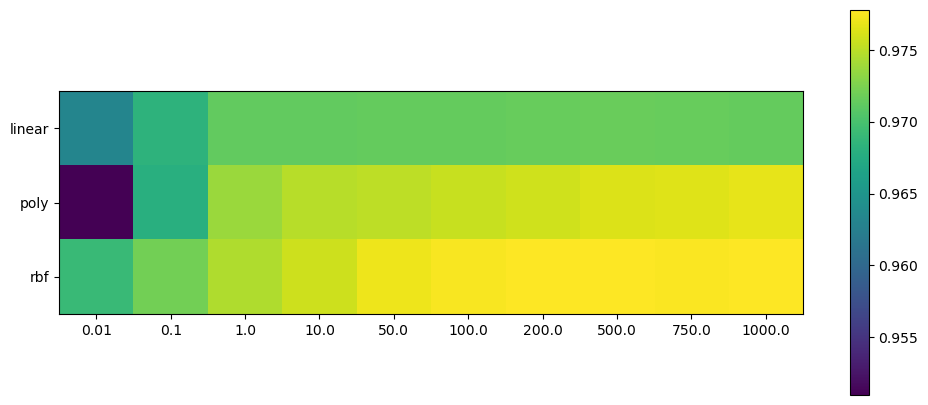

In [17]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,5))

plt.imshow(scores[..., -1].astype(float))
plt.xticks(range(len(C_values)), C_values)
plt.yticks(range(len(kernels)), kernels)
plt.colorbar();

Plot classification boundaries

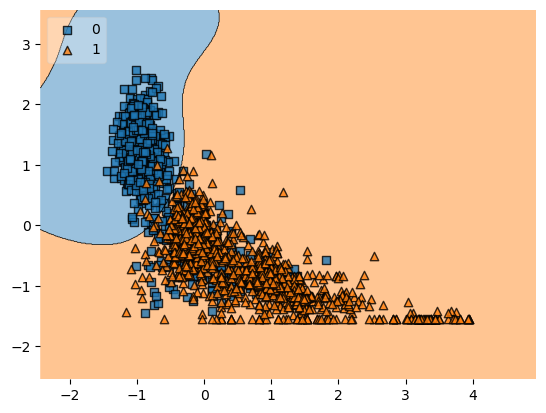

In [8]:
mod = SVC(C=50.0, kernel='rbf')
mod.fit(X_train[:2000,:2], y_train[:2000])
plot_decision_regions(X_train[:2000,:2], y_train.values[:2000], clf=mod, legend=2) #add feature_index
plt.show()

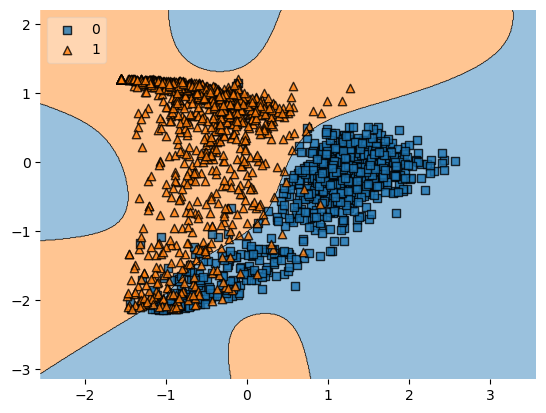

In [9]:
mod = SVC(C=50.0, kernel='rbf')
mod.fit(X_train[:2000,1:3], y_train[:2000])
plot_decision_regions(X_train[:2000,1:3], y_train.values[:2000], clf=mod, legend=2)
plt.show()

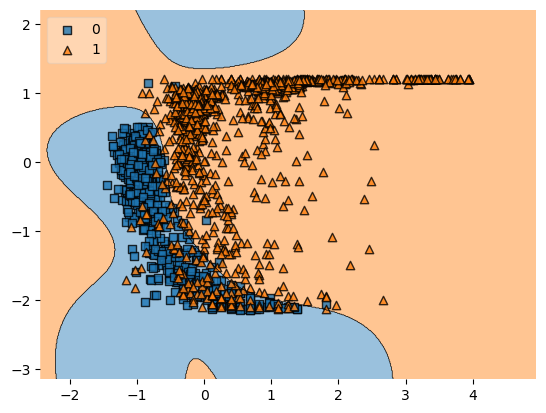

In [18]:
mod = SVC(C=50.0, kernel='rbf')
mod.fit(X_train[:2000,[0,2]], y_train[:2000])
plot_decision_regions(X_train[:2000,[0,2]], y_train.values[:2000], clf=mod, legend=2)
plt.show()

In [ ]:
plot_decision_regions()

Whole df

In [ ]:
df = pd.read_csv('/home/tobamo/analize/project-tobamo/analysis/fragmented_orf/results/combined_testB_data.csv')

In [ ]:
df.pair_type.value_counts()

tobamo-tobamo    3790000
og-tobamo        3046000
Name: pair_type, dtype: int64

Select & split the data

In [ ]:
data = sub_df[['identity_score', 'gap_ratio', 'N/aln_len', 'pair_type', 'len']].reset_index(drop=True)

X = data[['identity_score', 'gap_ratio', 'N/aln_len', 'len']]
y = (data['pair_type'] == 'tobamo-tobamo').astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
data2 = sub_df

X2 = data2[['identity_score', 'gap_ratio', 'N/aln_len', 'M', 'N', 'aln_len', 'orf_len', 'ref_len', 'gap_openings','aln_orf_len','len']]
y2 = (data2['pair_type'] == 'tobamo-tobamo').astype(int)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.33, random_state=42)

Standardizing the features

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
scaler2 = StandardScaler()
X2_train = scaler2.fit_transform(X2_train)
X2_test = scaler2.fit_transform(X2_test)

Train the model

In [ ]:
model = SVC(kernel='linear', C=0.1)
model.fit(X_train, y_train)

SVC(C=0.1, kernel='linear')

In [ ]:
model2 = SVC(kernel='linear', C=0.1)
model2.fit(X2_train, y2_train)

SVC(C=0.1, kernel='linear')

Evaluate the model

In [ ]:
model.score(X_test, y_test)

0.9596613325058735

In [ ]:
model2.score(X2_test, y2_test)

0.9685269737133738